In [1]:
import pandas as pd
import re

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from os import listdir, walk
from os.path import isfile, join
from pandas.plotting import parallel_coordinates
from tabulate import tabulate, SEPARATING_LINE



# Generate construction heuristics tables

In [3]:
df = pd.read_csv('analysis_fixed.csv')

In [4]:
df.columns

Index(['Instance_Name', 'Number_Of_Customers', 'Number_Of_Hotels',
       'Objective_Value', 'Sum_of_Trips', 'Penalties', 'Hotel_Fees',
       'Max_Trip_Length', 'Number_Of_Trips', 'Prize', 'Time', 'Trace'],
      dtype='object')

In [5]:
table_0 = df[['Instance_Name','Objective_Value','Sum_of_Trips','Penalties','Hotel_Fees']]
table_1 = df[['Instance_Name','Max_Trip_Length','Number_Of_Trips','Prize','Time']]

In [6]:
instances = list(df['Instance_Name'].unique())

In [7]:
print(tabulate(table_0, headers=table_0.columns, tablefmt='latex'))

\begin{tabular}{rlrrrr}
\hline
    & Instance\_Name   &   Objective\_Value &   Sum\_of\_Trips &   Penalties &   Hotel\_Fees \\
\hline
  0 & test            &              1070 &            970 &           0 &          100 \\
  1 & rc101\_1         &               235 &            235 &           0 &            0 \\
  2 & pr8\_1           &            102153 &           2153 &           0 &       100000 \\
  3 & eil51\_1         &               405 &            347 &          58 &            0 \\
  4 & berlin51\_1      &            909649 &           9649 &           0 &       900000 \\
  5 & berlin52\_2      &              7390 &           5888 &         440 &         1062 \\
  6 & berlin52\_3      &              6343 &           4812 &         887 &          644 \\
  7 & rc101\_2         &            701822 &           1822 &           0 &       700000 \\
  8 & rc101\_3         &              1002 &            681 &          99 &          222 \\
  9 & pr8\_2           &            307

In [8]:
print(tabulate(table_1, headers = table_1.columns, tablefmt='latex'))

\begin{tabular}{rlrrrr}
\hline
    & Instance\_Name   &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize &        Time \\
\hline
  0 & test            &               600 &                 2 &    2000 & 0.000561237 \\
  1 & rc101\_1         &               235 &                 1 &    1000 & 0.00239897  \\
  2 & pr8\_1           &              1774 &                 2 &    3000 & 0.0963712   \\
  3 & eil51\_1         &               347 &                 1 &     719 & 0.207381    \\
  4 & berlin51\_1      &              1146 &                10 &    5100 & 0.0672994   \\
  5 & berlin52\_2      &              1257 &                 6 &    1336 & 0.0863488   \\
  6 & berlin52\_3      &              1148 &                 5 &     889 & 0.0753951   \\
  7 & rc101\_2         &               234 &                 8 &   10000 & 0.122677    \\
  8 & rc101\_3         &               240 &                 3 &    2803 & 1.22996     \\
  9 & pr8\_2           &              1965 &               

In [9]:
# 8 is rc101_3
points = df['Trace'][8].split(";")
int_points = []

int_points.append(int(points[0][1:]))
for i in range(1,len(points) - 1):
    int_points.append(int(points[i]))
int_points.append(int(points[len(points) - 1][:-1]))

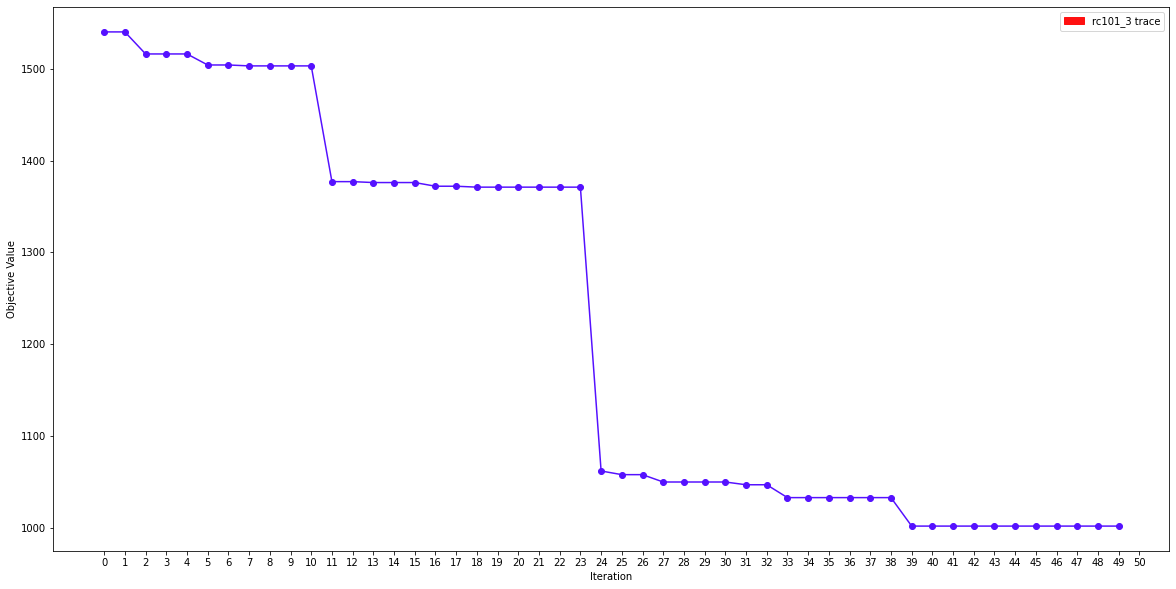

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(list(range(len(int_points))), int_points, '-o', color='#5511ff')

ax.set_xlabel("Iteration")
ax.set_ylabel("Objective Value")
patches = [mpatches.Patch(color='#ff1111', label='rc101_3 trace')]
           

ax.legend(handles=patches, loc='upper right')
plt.xticks(list(range(len(int_points) + 1)))
plt.savefig('vnd_rc101_3_trace.png', dpi=300)
plt.show()